In [2]:
%load_ext autoreload
%autoreload 2

# Business-as-usual analysis

In [3]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from ema_workbench import load_results
from unbreakable.analysis.analyzer import *
from unbreakable.analysis.visualizer import *
sns.set_theme(style="ticks")

In [4]:
# Parameters for report writing
savefig = False
savetab = False
figures_folder = '../../reports/Dominica/figures/analysis/'
tables_folder = '../../reports/Dominica/tables/analysis/'

## Load results

In [9]:
# Load results
country = 'Dominica'
return_period = 100
n_scenarios = 3000
n_policies = 0
results = load_results(f'../../experiments/{country}/return_period={return_period}, scenarios={n_scenarios}, policies={n_policies}.tar.gz')

# Prepare outcomes
outcomes = prepare_outcomes(results, add_uncertainties=False, add_policies=False)

## EDA

### Single scenario, single district 

In [10]:
# Print all outcomes for a single scenario
scenario = 0
df = outcomes[outcomes['scenario'] == scenario].copy()
df.set_index('region', inplace=True)
# df.drop(columns=['weighted_vuln_quint', 'weighted_vuln_dec'], inplace=True)
numeric_columns = df.columns[3:-1].tolist()
df[numeric_columns].round(2).style.format("{:,.2f}")

,tot_pop,n_aff_people,n_retrofitted,n_retrofitted_hh,n_aff_retrofitted,n_aff_retrofitted_hh,tot_asset_surv,tot_exposed_asset,tot_asset_loss,expected_loss_frac,region_pml,annual_avg_consum,pov_line_adjust,mean_recovery_rate,tot_consum_loss_npv,n_poor_initial,n_poor_affected,n_new_poor,initial_poverty_gap,new_poverty_gap_initial,new_poverty_gap_all,annual_avg_consum_loss,annual_avg_consum_loss_pct,r,n_poor_ratio,n_new_poor_increase_pp
region,,,,,,,,,,,,,,,,,,,,,,,,,,
St. George,"90,278.69","52,250.89",0.00,0.00,0.00,0.00,"5,398,394,680.58","1,002,936,475.89","193,411,510.27",0.20,"195,870,372.33","2,490.49","1,157.44",0.30,"151,639,599.03","13,861.00","7,690.00","7,042.00",19.96,24.44,20.22,290.21,11.47,3.12,15.00,7.80
St. John,"18,973.86","10,893.58",0.00,0.00,0.00,0.00,"1,525,653,735.63","146,917,090.94","31,077,920.12",0.21,"30,721,128.56","1,325.95",599.94,0.27,"21,224,802.52","3,569.00","2,059.00",557.00,15.89,22.49,21.05,194.84,15.38,1.27,19.00,2.94
St. Peter,"5,125.54","3,601.90",0.00,0.00,0.00,0.00,"228,919,767.06","81,914,004.37","19,537,590.15",0.23,"18,961,436.29","3,468.22","2,229.27",0.26,"15,825,949.81","1,161.00",796.00,198.00,24.22,29.18,25.18,439.38,12.31,5.63,23.00,3.86
St. Joseph,"28,970.38","19,491.35",0.00,0.00,0.00,0.00,"1,759,585,197.44","175,268,750.64","43,705,980.49",0.24,"42,688,959.00",784.15,620.56,0.24,"29,791,945.39","15,394.00","10,334.00",108.00,33.22,41.81,41.65,152.85,19.43,0.52,53.00,0.37
St. Paul,"35,699.76","26,859.59",0.00,0.00,0.00,0.00,"1,864,992,970.66","382,090,503.45","98,236,224.43",0.26,"99,840,454.14","2,364.80","1,276.37",0.28,"73,506,701.89","14,938.00","10,925.00",871.00,37.64,44.33,42.48,273.67,12.77,2.28,42.00,2.44
St. Luke,"7,241.94","4,934.61",0.00,0.00,0.00,0.00,"405,449,163.37","41,700,575.95","10,570,041.33",0.27,"11,075,506.75","1,029.55",640.76,0.26,"7,273,617.53","1,290.00",909.00,472.00,50.19,54.53,43.79,147.40,13.84,0.94,18.00,6.52
St. Mark,"11,992.24","6,466.38",0.00,0.00,0.00,0.00,"524,076,039.71","125,273,541.49","24,185,536.04",0.19,"23,467,630.73","2,842.39","1,489.20",0.26,"19,118,353.20","3,690.00","2,086.00",235.00,12.65,17.79,17.46,295.66,10.65,4.03,31.00,1.96
St. Patrick,"36,798.71","23,955.88",0.00,0.00,0.00,0.00,"1,648,194,582.37","149,203,255.36","36,321,385.13",0.25,"36,831,137.43",704.85,563.97,0.25,"24,733,055.06","17,636.00","11,157.00","1,363.00",36.71,42.52,39.49,103.24,14.33,0.56,48.00,3.70
St. David,"26,585.01","16,417.87",0.00,0.00,0.00,0.00,"1,922,158,753.46","114,881,153.80","25,927,888.02",0.22,"25,399,621.57",772.44,372.35,0.24,"16,617,241.74","12,538.00","7,677.00",511.00,30.03,35.83,34.86,101.21,12.74,0.60,47.00,1.92


In [11]:
# Let's examine a single scenario in details
scenario = 0
df = outcomes[outcomes['scenario'] == scenario].copy()
df.set_index('region', inplace=True)

# And a single district as an example
district = 'St. George'
print('District: ', district)
total_population = round(df.loc[district, 'tot_pop'])
n_affected = round(df.loc[district, 'n_aff_people'])
print('Total population: ', total_population)
print('Number of affected people: ', n_affected)

n_poor_initial = round(df.loc[district, 'n_poor_initial'])
n_new_poor = round(df.loc[district, 'n_new_poor'])
pct_poor_initial = round(n_poor_initial / total_population * 100, 2)
pct_new_poor = round((n_new_poor + n_poor_initial) / total_population * 100, 2)
pct_poor_increase = round(n_new_poor / total_population * 100, 2)
initial_poverty_gap = round(df.loc[district, 'initial_poverty_gap'], 2)
new_poverty_gap_init = round(df.loc[district, 'new_poverty_gap_initial'], 2)
new_poverty_gap_all = round(df.loc[district, 'new_poverty_gap_all'], 2)
print()
print('Number of poor: ', n_poor_initial)
print('Number of new poor: ', n_new_poor)
print(f'Percentage of poor: {pct_poor_initial}%')
print(f'Percentage of new poor: {pct_new_poor}%')
print(f'Percentage of increase in poor: {pct_poor_increase}%')
print('Initial poverty gap: ', initial_poverty_gap)
print('New poverty gap initial poor: ', new_poverty_gap_init)
print('New poverty gap all poor: ', new_poverty_gap_all)

annual_average_consumption = round(df.loc[district, 'annual_avg_consum'])
annual_average_consumption_loss = round(df.loc[district, 'annual_avg_consum_loss'])
annual_average_consumption_loss_pct = round(df.loc[district, 'annual_avg_consum_loss_pct'])
print()

print('Annual average consumption: ', annual_average_consumption)
print('Annual average consumption loss: ', annual_average_consumption_loss)
print(f'Annual average consumption loss percentage: {annual_average_consumption_loss_pct}%')

print()
r = round(df.loc[district, 'r'], 2)
print('Socio-economic resilience: ', r)

District:  St. George
Total population:  90279
Number of affected people:  52251

Number of poor:  13861
Number of new poor:  7042
Percentage of poor: 15.35%
Percentage of new poor: 23.15%
Percentage of increase in poor: 7.8%
Initial poverty gap:  19.96
New poverty gap initial poor:  24.44
New poverty gap all poor:  20.22

Annual average consumption:  2490
Annual average consumption loss:  290
Annual average consumption loss percentage: 11%

Socio-economic resilience:  3.12


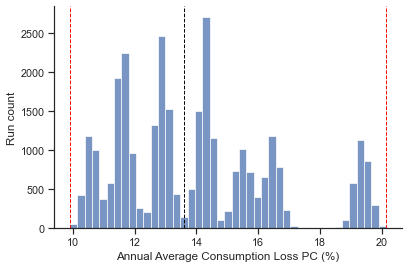

In [12]:
annotated_hist(outcomes, savefig=savefig, annotate=False)
plt.savefig(figures_folder + 'consumption_loss_hist.png', dpi=300, bbox_inches='tight')

In [13]:
# # Print all outcomes for a single scenario
# district = 'St. George'
# df = outcomes[outcomes['district'] == district].copy()
# df.drop(columns=['years_in_poverty'], inplace=True)
# columns_of_interest = ['total_consumption_loss', 
#                        'n_affected_people', 'annual_average_consumption', 'n_new_poor', 'n_poor_affected',
#                        'annual_average_consumption_loss', 'annual_average_consumption_loss_pct', 'r', 'n_new_poor_increase_pp']
# sns.pairplot(df[columns_of_interest])
# plt.tight_layout();

### Multiple scenarios & multiple districts

In [14]:
# Let's aggregate across scenarios and take the mean
df = outcomes.iloc[:, 2:-1].groupby('region').mean(numeric_only=True).round(2)
df['fraction_affected'] = df['n_aff_people'] / df['tot_pop']
df['fraction_affected'].sort_values(ascending=False)

region
St. Paul       0.772875
St. Luke       0.742490
St. Peter      0.716857
St. Patrick    0.683970
St. Joseph     0.677432
St. Andrew     0.597007
St. David      0.589510
St. George     0.588486
St. John       0.569239
St. Mark       0.528666
Name: fraction_affected, dtype: float64

In [15]:
# Let's aggregate across scenarios and take the mean
outcomes.iloc[:, 2:-1].groupby('region').mean(numeric_only=True).round(2).sort_values(by='r', ascending=False)

,random_seed,tot_pop,n_aff_people,n_retrofitted,n_retrofitted_hh,n_aff_retrofitted,n_aff_retrofitted_hh,tot_asset_surv,tot_exposed_asset,tot_asset_loss,...,n_poor_affected,n_new_poor,initial_poverty_gap,new_poverty_gap_initial,new_poverty_gap_all,annual_avg_consum_loss,annual_avg_consum_loss_pct,r,n_poor_ratio,n_new_poor_increase_pp
region,,,,,,,,,,,,,,,,,,,,,
St. Peter,5.000018e+08,5125.54,3674.28,0.0,0.0,0.0,0.0,2.254011e+08,8.191400e+07,1.896813e+07,...,831.89,86.29,24.22,29.03,27.36,427.42,11.68,5.78,23.0,1.68
St. Mark,5.000018e+08,11992.24,6339.89,0.0,0.0,0.0,0.0,5.378013e+08,1.252735e+08,2.347021e+07,...,1951.29,277.93,12.65,17.25,16.84,292.85,10.60,4.02,31.0,2.32
St. George,5.000018e+08,90278.69,53127.71,0.0,0.0,0.0,0.0,5.391320e+09,1.002936e+09,1.958653e+08,...,8161.76,7215.07,19.96,25.23,21.06,285.85,11.57,3.07,15.0,7.99
St. Paul,5.000018e+08,35699.75,27591.46,0.0,0.0,0.0,0.0,1.881712e+09,3.820905e+08,9.983306e+07,...,11546.23,1212.91,37.64,44.91,42.18,280.91,12.86,2.22,42.0,3.40
St. John,5.000018e+08,18973.86,10800.67,0.0,0.0,0.0,0.0,1.536831e+09,1.469171e+08,3.069823e+07,...,2033.76,533.36,15.89,23.00,21.48,194.04,15.49,1.26,19.0,2.81
St. Luke,5.000018e+08,7241.94,5377.07,0.0,0.0,0.0,0.0,4.074323e+08,4.170058e+07,1.108052e+07,...,956.86,502.20,50.19,54.71,43.77,148.10,14.15,0.90,18.0,6.93
St. David,5.000018e+08,26585.01,15672.12,0.0,0.0,0.0,0.0,1.902591e+09,1.148812e+08,2.539705e+07,...,7390.41,545.20,30.03,35.83,34.77,99.57,12.97,0.59,47.0,2.05
St. Patrick,5.000018e+08,36798.71,25169.23,0.0,0.0,0.0,0.0,1.636505e+09,1.492033e+08,3.681943e+07,...,12064.93,1078.98,36.71,42.87,40.51,101.48,14.35,0.53,48.0,2.93
St. Andrew,5.000018e+08,46678.50,27867.39,0.0,0.0,0.0,0.0,2.424014e+09,2.191651e+08,4.917455e+07,...,13605.08,2981.84,41.82,47.85,43.54,118.99,16.47,0.52,49.0,6.39


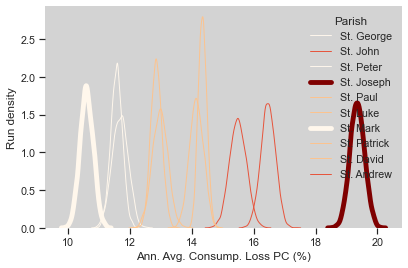

In [16]:
coloured_density_plots(outcomes, savefig, scheme='fisher_jenks', k=4)
plt.savefig(figures_folder + 'consumption_loss_density.png', dpi=300, bbox_inches='tight')

In [17]:
tab = outcomes.iloc[:, 2:-1].groupby('region').describe().round(2)
column = 'n_new_poor'
tab = tab.sort_values(by=(column, 'mean'), ascending=False)
tab[[column]].iloc[:,1:].style.format("{:,.2f}")

## Weeks in poverty & Number of new poor

In [18]:
average_years_in_poverty = {}
for district in outcomes['region'].unique():
    df = outcomes[outcomes['region'] == district].copy()
    total_years_in_poverty = {}
    for d in df['years_in_poverty']:
        for key, value in d.items():
            total_years_in_poverty[key] = total_years_in_poverty.get(key, 0) + value
    average_years_in_poverty[district] = {k: v / len(df) for k, v in total_years_in_poverty.items()}
average_years_in_poverty = pd.DataFrame(average_years_in_poverty).T

In [19]:
average_years_in_poverty = get_weeks_in_poverty_tab(outcomes)

if savetab:
    # average_years_in_poverty.rename({'Anse-La-Raye & Canaries': 'Anse-La-Raye \& Canaries'}, inplace=True, axis=0)
    average_years_in_poverty.astype(int).style\
        .background_gradient(cmap='Blues', axis=0)\
        .set_caption('Average Years in Poverty By District')\
        .to_latex(tables_folder + 'av_years_in_pov.tex',
                  # escape=False,
                  caption='Average Years in Poverty By District',
                  label='tab:av_years_in_pov',
                  convert_css=True,
                  multicol_align="|c|",
                  hrules=True,
                  position_float="centering")

In [20]:
# Number of people in poverty for 1 / 3 / 5 years

In [21]:
# More than 1 year in poverty
n_years = 1
average_years_in_poverty.iloc[:,n_years:].sum(axis=1)

Region
St. George     7215.088333
St. John        533.384667
St. Peter        86.266667
St. Joseph       98.566000
St. Paul       1212.926333
St. Luke        502.186667
St. Mark        277.900667
St. Patrick    1078.984667
St. David       545.215667
St. Andrew     2981.810667
dtype: float64

In [22]:
# More than 3 years in poverty
n_years = 3
average_years_in_poverty.iloc[:,n_years:].sum(axis=1)

Region
St. George     7212.806667
St. John        533.384667
St. Peter        86.266667
St. Joseph       98.566000
St. Paul       1203.551333
St. Luke        502.186667
St. Mark        277.729667
St. Patrick     833.908667
St. David       545.215667
St. Andrew     2981.395667
dtype: float64

In [23]:
# More than 5 years in poverty
n_years = 5
average_years_in_poverty.iloc[:,n_years:].sum(axis=1)

Region
St. George     4775.538000
St. John        358.411000
St. Peter        10.355333
St. Joseph       76.631000
St. Paul        502.514333
St. Luke        481.040333
St. Mark        262.089000
St. Patrick      20.130333
St. David        21.540000
St. Andrew     1227.643000
dtype: float64

In [24]:
average_years_in_poverty.astype(int).style\
        .background_gradient(cmap='Blues', axis=0)\
        .set_caption('Average Years in Poverty By District')

,0,1,2,3,4,5,6,7,8,9,10
Region,,,,,,,,,,,
St. George,0,0,2,644,1792,1969,2189,616,0,0,0
St. John,0,0,0,160,14,333,24,0,0,0,0
St. Peter,0,0,0,64,11,10,0,0,0,0,0
St. Joseph,0,0,0,0,21,10,11,54,0,0,0
St. Paul,0,0,9,627,73,99,251,151,0,0,0
St. Luke,0,0,0,4,16,347,117,15,0,0,0
St. Mark,0,0,0,7,8,260,1,0,0,0,0
St. Patrick,0,0,245,805,8,20,0,0,0,0,0
St. David,0,0,0,2,521,21,0,0,0,0,0


In [25]:
# Get the number of new poor in each district
regions = outcomes['region'].unique().tolist()
n_districts = len(regions)
d = {}
for region in regions:
    df = outcomes[outcomes['region'] == region]
    d[region] = df['n_new_poor'].values.tolist()

In [26]:
# Make a coloured table
tab = pd.DataFrame(d).describe().T.sort_values('mean', ascending=False).round(2).drop('count', axis=1)
tab.style.background_gradient(cmap='Blues', subset=['mean'])\
         .background_gradient(cmap='Reds', subset=['std'])\
         .background_gradient(cmap='Oranges', subset=['min'])\
         .background_gradient(cmap='Greens', subset=['25%'])\
         .background_gradient(cmap='Greens', subset=['50%'])\
         .background_gradient(cmap='Greens', subset=['75%'])\
         .background_gradient(cmap='Purples', subset=['max'])\
         .format(decimal='.', thousands=',', precision=0)

,mean,std,min,25%,50%,75%,max
St. George,"7,215",862,"3,527","6,636","7,204","7,799","10,611"
St. Andrew,"2,982",273,"1,925","2,804","2,990","3,166","3,802"
St. Paul,"1,213",512,631,828,888,"1,717","2,975"
St. Patrick,"1,079",722,31,172,"1,406","1,663","2,364"
St. David,545,74,274,496,545,594,811
St. John,533,50,372,500,533,567,709
St. Luke,502,36,396,479,503,527,629
St. Mark,278,35,140,254,277,302,393
St. Joseph,99,8,65,93,99,104,127
St. Peter,86,85,18,22,23,191,241


In [27]:
# Get the number of new poor in each district
regions = outcomes['region'].unique().tolist()
n_regions = len(regions)
d = {}
for region in regions:
    df = outcomes[outcomes['region'] == region]
    d[region] = df['n_new_poor_increase_pp'].values.tolist()

In [28]:
# Make a coloured table
tab = pd.DataFrame(d).describe().T.sort_values('mean', ascending=False).round(2).drop('count', axis=1)
tab.style.background_gradient(cmap='Blues', subset=['mean'])\
         .background_gradient(cmap='Reds', subset=['std'])\
         .background_gradient(cmap='Oranges', subset=['min'])\
         .background_gradient(cmap='Greens', subset=['25%'])\
         .background_gradient(cmap='Greens', subset=['50%'])\
         .background_gradient(cmap='Greens', subset=['75%'])\
         .background_gradient(cmap='Purples', subset=['max'])\
         .format(decimal='.', thousands=',', precision=2)

,mean,std,min,25%,50%,75%,max
St. George,7.99,0.95,3.91,7.35,7.98,8.64,11.75
St. Luke,6.93,0.49,5.47,6.61,6.95,7.28,8.69
St. Andrew,6.39,0.59,4.12,6.01,6.41,6.78,8.15
St. Paul,3.40,1.43,1.77,2.32,2.49,4.81,8.33
St. Patrick,2.93,1.96,0.08,0.47,3.82,4.52,6.42
St. John,2.81,0.26,1.96,2.64,2.81,2.99,3.74
St. Mark,2.32,0.29,1.17,2.12,2.31,2.52,3.28
St. David,2.05,0.28,1.03,1.87,2.05,2.23,3.05
St. Peter,1.68,1.67,0.35,0.43,0.45,3.73,4.70
St. Joseph,0.34,0.03,0.22,0.32,0.34,0.36,0.44


## Average vulnerability

In [29]:
# vulnerability_by_quintile = get_average_weighted_vulnerability(outcomes, quintile=True)
# vulnerability_by_quintile.T.style.format("{:.2f}")

In [30]:
# vulnerability_by_decile = get_average_weighted_vulnerability(outcomes, quintile=False)
# vulnerability_by_decile.T.style.format("{:.2f}")

## Raincloud plots

Raincloud plot is a combination of a boxplot, a kernel density plot, and a dot plot. It is a great way to visualize the distribution of the data. Especially, when the distribution is skewed and you have a lot of data points.

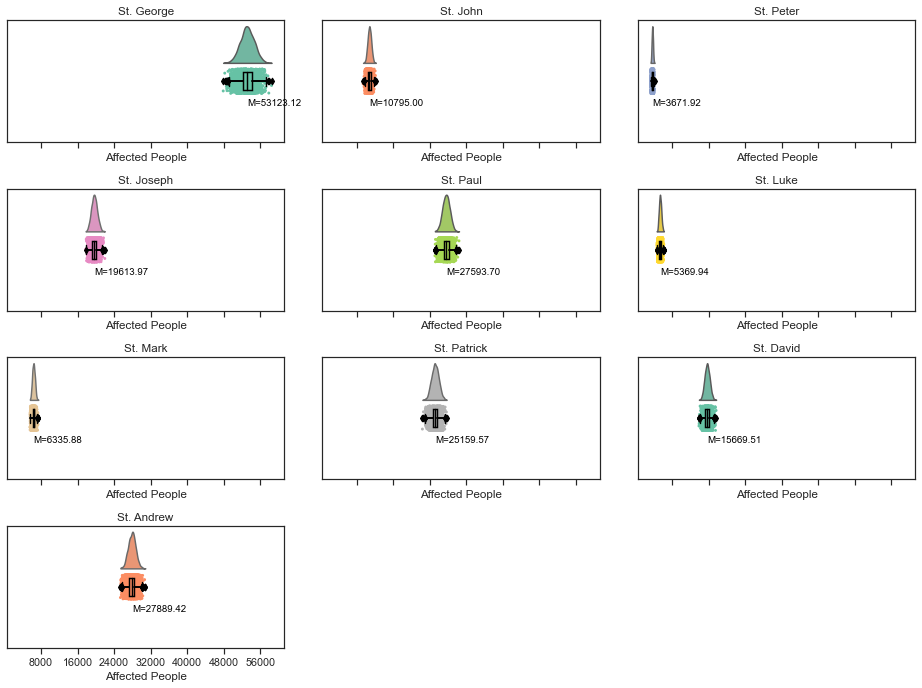

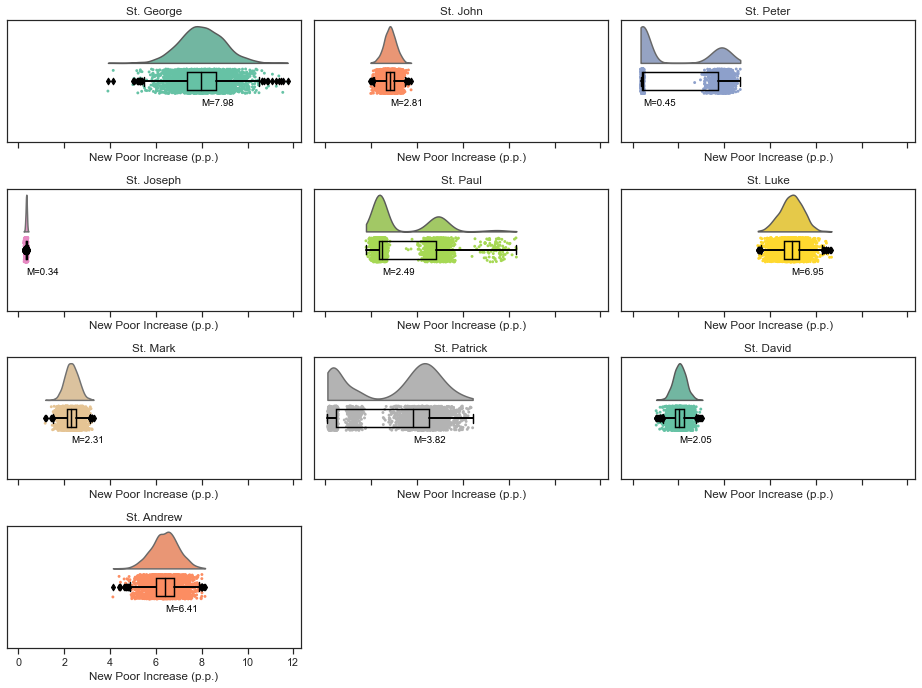

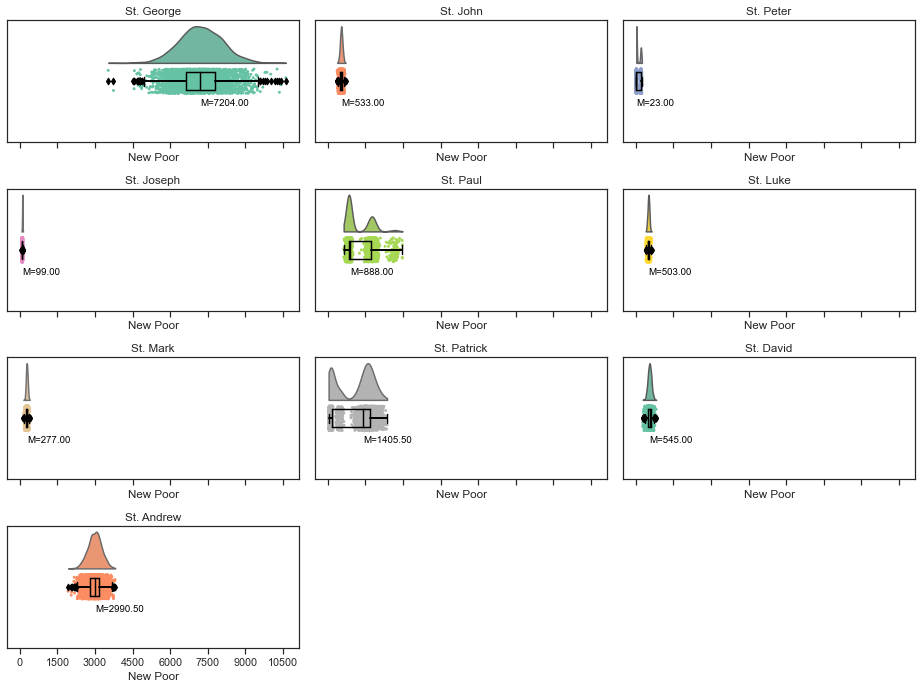

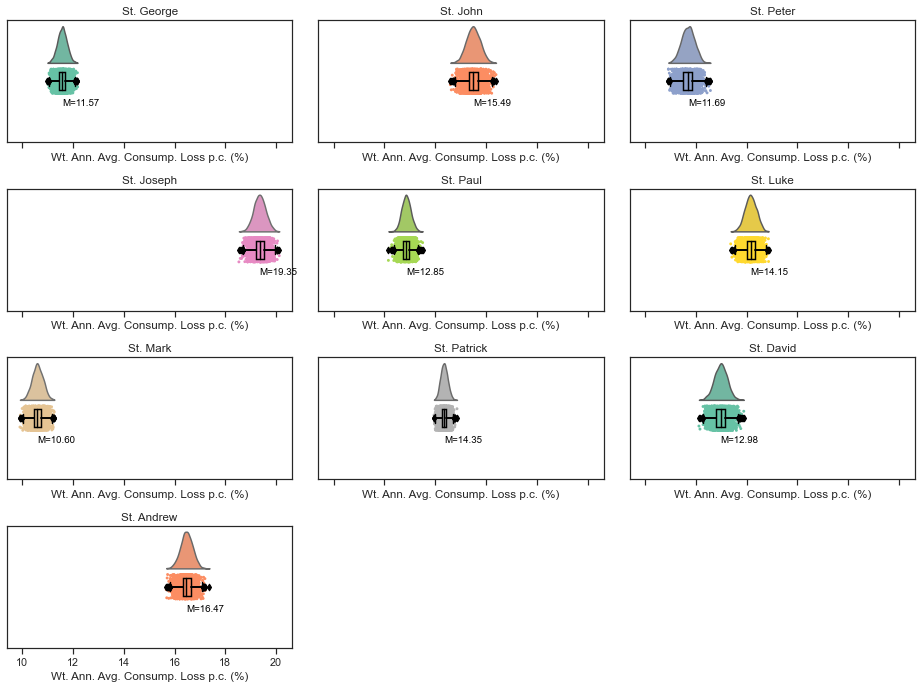

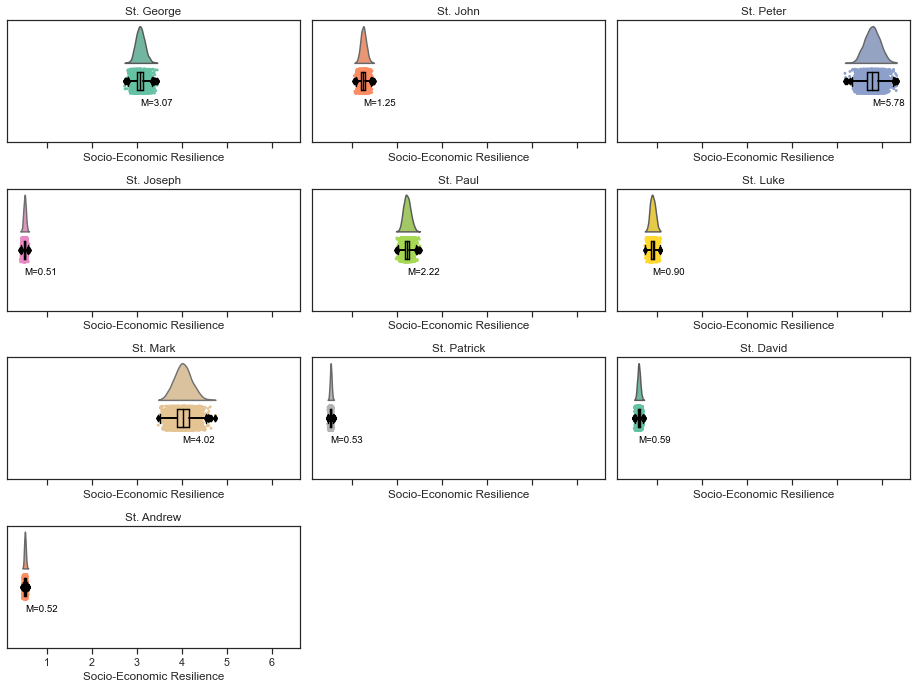

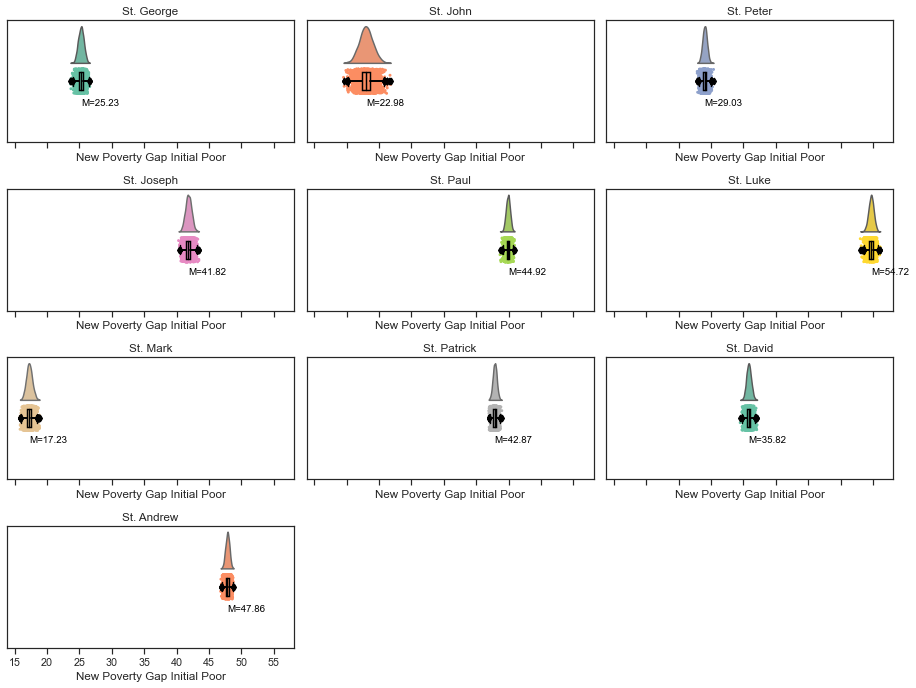

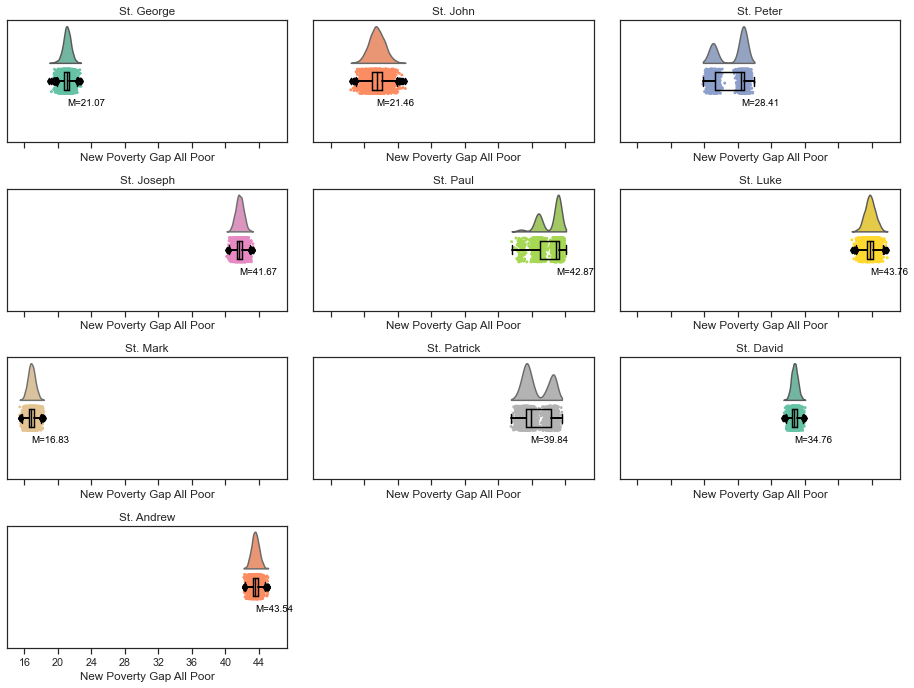

In [31]:
outcomes['policy'] = 'None'
raincloud_plot(outcomes, savefig=savefig)

## Outcomes spatially

Another way to visualize the outcomes is to use choropleth maps. These maps are useful when you have data that is aggregated by a geographic area. For example, if we have data on how many people became poor after a disaster in the districts of Saint Lucia, we could use a choropleth map to show these numbers.  

What is important to remember is that **these maps do not show the variance** within each district. Instead, they show the mean or median value for each district.

In [33]:
# Get the country shapefile and aggregated outcomes
aggregation = 'median'
country = 'Dominica'
aggregated_outcomes = get_spatial_outcomes(outcomes=outcomes, country=country, aggregation=aggregation)

# Convert to be in millions
aggregated_outcomes[['tot_exposed_asset', 'tot_consum_loss_npv', 'region_pml']] /= 1000000
aggregated_outcomes[['tot_exposed_asset', 'tot_consum_loss_npv', 'region_pml']] = aggregated_outcomes[['tot_exposed_asset', 'tot_consum_loss_npv', 'region_pml']].round(2)


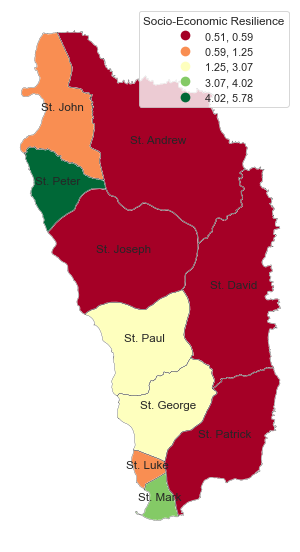

In [35]:
k = 5
# column = 'annual_avg_consum_loss_pct'
# title = 'Ann. Av. Cons. Loss PC (%)'
# cmap = 'YlOrRd'
column = 'r'
title = 'Socio-Economic Resilience'
cmap = 'RdYlGn'
# column = 'pml_relative'
# title = 'PML (%)'

# cmap = 'RdYlGn'
scheme = 'fisher_jenks'
ax = aggregated_outcomes.plot(column=column, scheme=scheme, k=k, cmap=cmap, legend=True, figsize=(10,10), legend_kwds={"title":title, "loc" : "upper right"})
aggregated_outcomes.plot(ax=ax, color='none', edgecolor='black', linewidth=0.25)
ax.axis('off')
for idx, row in aggregated_outcomes.iterrows():
    ax.annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
plt.savefig('r.png', dpi=300, bbox_inches='tight', transparent=True)
if savefig:
    plt.savefig(figures_folder + f'soc_econ_res_map.png', dpi=300, bbox_inches='tight')

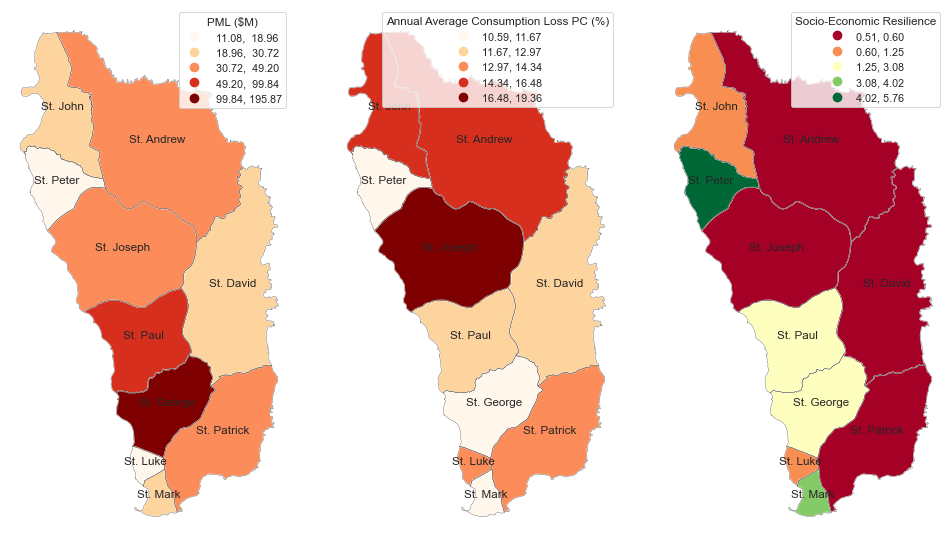

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=(14,8))
k = 5
columns = ['region_pml', 'annual_avg_consum_loss_pct', 'r']
titles = ['PML ($M)', 'Annual Average Consumption Loss PC (%)', 'Socio-Economic Resilience']
cmaps = ['OrRd', 'OrRd', 'RdYlGn']

scheme = 'fisher_jenks'
for i, column in enumerate(columns):
    title = titles[i]
    cmap = cmaps[i]
    aggregated_outcomes.plot(column=column, scheme=scheme, k=k, cmap=cmap, legend=True, ax=ax[i], legend_kwds={"title":title, "loc" : "upper right"})
    aggregated_outcomes.plot(ax=ax[i], color='none', edgecolor='black', linewidth=0.25)
    ax[i].axis('off')
    for idx, row in aggregated_outcomes.iterrows():
        ax[i].annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=12)
plt.tight_layout()
if savefig:
    plt.savefig(figures_folder + f'soc_econ_res_map.png', dpi=300, bbox_inches='tight')

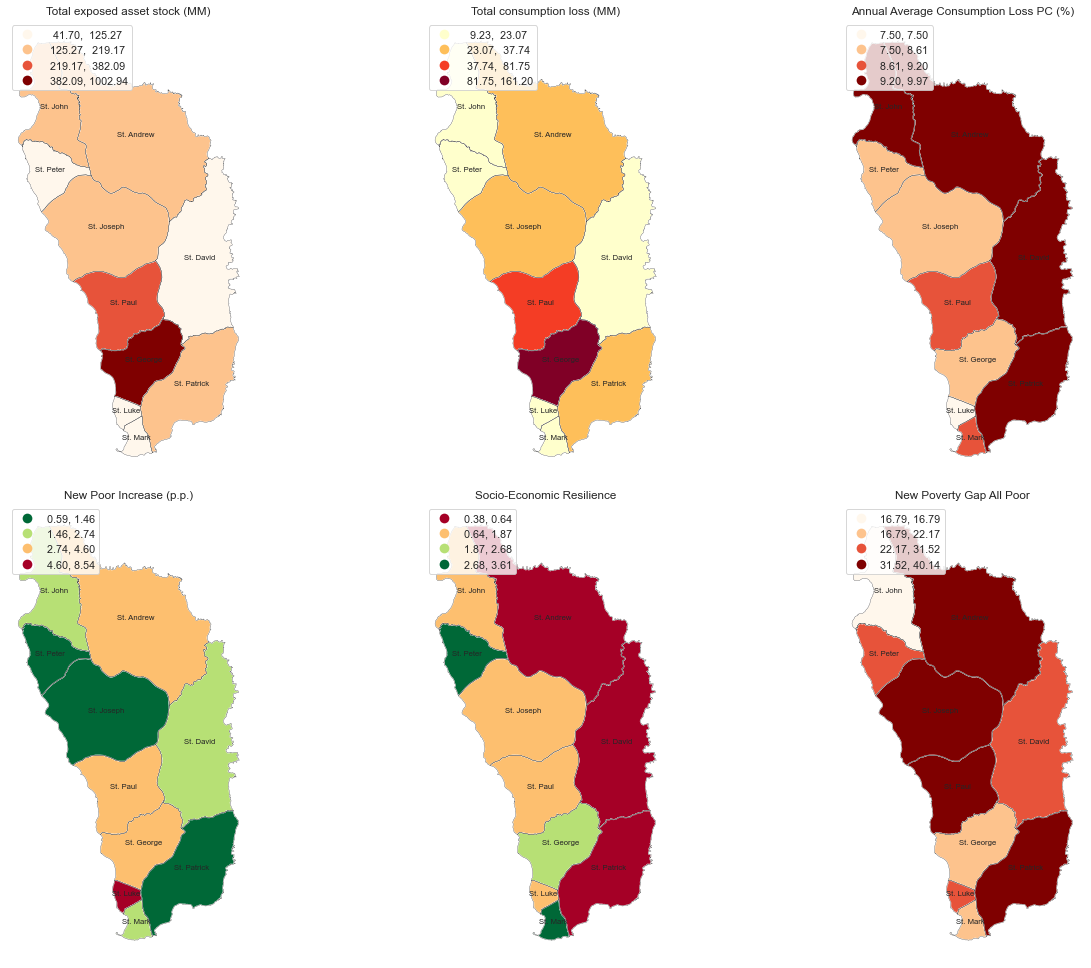

In [43]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 14))

outcomes_to_plot = [
    'tot_exposed_asset',
    'total_consumption_loss',
    'annual_average_consumption_loss_pct',
    'n_new_poor_increase_pp',
    'r',
    'new_poverty_gap_all']

titles = ['Total exposed asset stock (MM)',
          'Total consumption loss (MM)',
          # 'Wt. Ann. Avg. Consump. Loss p.c. (%)',
          'Annual Average Consumption Loss PC (%)',
          'New Poor Increase (p.p.)',
          'Socio-Economic Resilience',
          'New Poverty Gap All Poor']

cmaps = ['OrRd', 'YlOrRd', 'OrRd', 'RdYlGn_r', 'RdYlGn', 'OrRd']

k = 4
for i, outcome in enumerate(outcomes_to_plot):
    aggregated_outcomes.plot(column=outcome, scheme='fisher_jenks', cmap=cmaps[i], k=k, ax=ax[i//3, i % 3], legend=True, legend_kwds={"loc": "upper left"})
    aggregated_outcomes.plot(ax=ax[i//3, i % 3], color='none', edgecolor='black', linewidth=0.25)
    ax[i//3, i % 3].set_title(titles[i])
    ax[i//3, i % 3].axis('off')
    for idx, row in aggregated_outcomes.iterrows():
        ax[i//3, i % 3].annotate(text=row['NAME'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=8)

# fig.suptitle(f'{aggregation.capitalize()} of 3,000 replications', fontsize=16)

fig.tight_layout()
if savefig:
    plt.savefig(figures_folder +
        f'{aggregation}_outcomes_spatially.png', dpi=300, bbox_inches='tight')

A bivariate or bi-variate choropleth helps to visualise relations between two variables spatially. 

In [118]:
# Load asset damage data
# asset_damage = pd.read_excel('../data/processed/asset_damage/Saint Lucia.xlsx')
# asset_damage['district'].replace({'AnseLaRayeCanaries' : 'Anse-La-Raye & Canaries'}, inplace=True)
# gdf = pd.merge(aggregated_outcomes, asset_damage, left_on='NAME_1', right_on='district', how='left')

In [92]:
# x_name = 'r'
# y_name = 'pml'
# x_label = 'Soc.-econ. res.'
# y_label = 'PML'

# tab = bivariate_choropleth(gdf.copy(), x_name, y_name, x_label, y_label, scheme='fisher_jenks', figsize=(7,6), return_table=True)
# if savefig:
#     plt.savefig('../reports/figures/analysis/bivariate_choropleth.png', dpi=300, bbox_inches='tight')

In [93]:
# nine_quadrants_plot(gdf.copy(), x_name, y_name)
# plt.xlabel('Socio-Economic Resilience')
# plt.ylabel('PML')
# if savefig:
#     plt.savefig('../reports/figures/analysis/9_quadrants.png', dpi=300, bbox_inches='tight')